In [29]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from glob import glob
import PIL
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator

from keras.callbacks import ReduceLROnPlateau
from keras.utils.np_utils import to_categorical 
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
data_dir_train = pathlib.Path("/content/drive/MyDrive/Cancer Detection/Test")
data_dir_test = pathlib.Path('/content/drive/MyDrive/Cancer Detection/Train')

In [4]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

118
2239


In [5]:
# Lets load using Keras

In [6]:
batch_size = 32
img_height = 180
img_width = 180

In [7]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    validation_split= 0.2,
    subset= 'training',
    image_size=(img_height,img_width),
    batch_size = batch_size
)

Found 118 files belonging to 9 classes.
Using 95 files for training.


In [8]:
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


In [9]:
# Avbove is the list of all classes of skin cancer

In [10]:
# Validation data set 

In [11]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 118 files belonging to 9 classes.
Using 23 files for validation.


In [12]:
# Visualize the data 

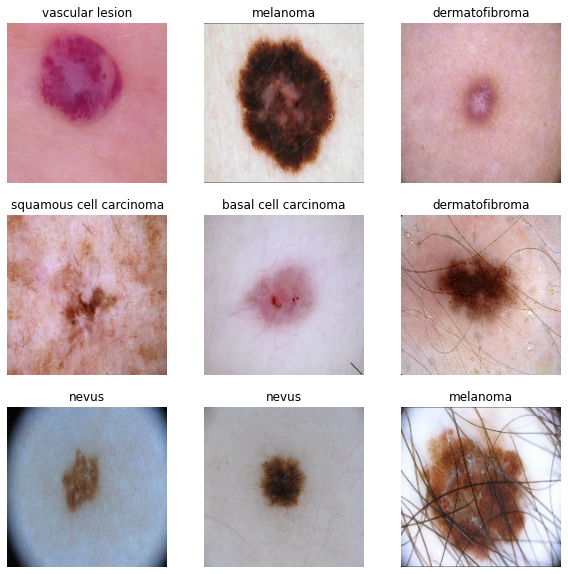

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [14]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [15]:
# Lets Create the model 

In [16]:
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
num_classes = 9
model = Sequential([
                    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3))
])
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (180, 180, 32)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(num_classes, activation = "softmax"))

In [18]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 32)      2432      
                                                                 
 conv2d_1 (Conv2D)           (None, 180, 180, 32)      25632     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 90, 90, 32)        25632     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                    

In [19]:
# Lets Train the model 

In [20]:
epochs = 30
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


3/3 [==============================] - 25s 9s/step - loss: 2.2220 - accuracy: 0.0947 - val_loss: 2.2292 - val_accuracy: 0.0000e+00
Epoch 2/30
3/3 [==============================] - 16s 5s/step - loss: 2.1758 - accuracy: 0.1684 - val_loss: 2.3026 - val_accuracy: 0.0000e+00
Epoch 3/30
3/3 [==============================] - 16s 6s/step - loss: 2.0652 - accuracy: 0.1789 - val_loss: 2.3265 - val_accuracy: 0.0435
Epoch 4/30
3/3 [==============================] - 16s 5s/step - loss: 2.0520 - accuracy: 0.1895 - val_loss: 2.4112 - val_accuracy: 0.1304
Epoch 5/30
3/3 [==============================] - 16s 5s/step - loss: 2.0420 - accuracy: 0.1579 - val_loss: 2.5292 - val_accuracy: 0.0870
Epoch 6/30
3/3 [==============================] - 16s 5s/step - loss: 2.0282 - accuracy: 0.1895 - val_loss: 2.4846 - val_accuracy: 0.0435
Epoch 7/30
3/3 [==============================] - 16s 5s/step - loss: 2.0207 - accuracy: 0.2105 - val_loss: 2.5949 - val_accuracy: 0.0435
Epoch 8/30
3/3 [=====================

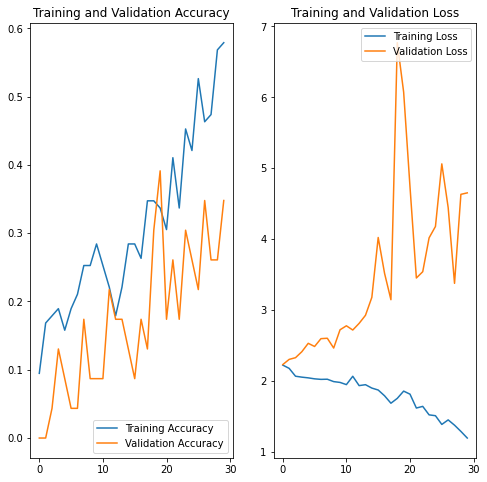

In [21]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [22]:
loss, accuracy = model.evaluate(train_ds, verbose=1,)
loss_v, accuracy_v = model.evaluate(val_ds, verbose=1)

print("Accuracy: ", accuracy)
print("Validation Accuracy: ",accuracy_v)
print("Loss: ",loss)
print("Validation Loss", loss_v)

1/1 [==============================] - 1s 842ms/step - loss: 4.6512 - accuracy: 0.3478
Accuracy:  0.6421052813529968
Validation Accuracy:  0.3478260934352875
Loss:  1.0267122983932495
Validation Loss 4.651228427886963


In [23]:
# hence model is overfitting 

In [43]:
path_list=[]
lesion_list=[]
for i in class_names:
      
    for j in data_dir_train.glob(i+'/*.jpg'):
        path_list.append(str(j))
        lesion_list.append(i)
dataframe_dict_original = dict(zip(path_list, lesion_list))
original_df = pd.DataFrame(list(dataframe_dict_original.items()),columns = ['Path','Label'])
original_df

,Path,Label
0,/content/drive/MyDrive/Cancer Detection/Test/a...,actinic keratosis
1,/content/drive/MyDrive/Cancer Detection/Test/a...,actinic keratosis
2,/content/drive/MyDrive/Cancer Detection/Test/a...,actinic keratosis
3,/content/drive/MyDrive/Cancer Detection/Test/a...,actinic keratosis
4,/content/drive/MyDrive/Cancer Detection/Test/a...,actinic keratosis
...,...,...
113,/content/drive/MyDrive/Cancer Detection/Test/s...,squamous cell carcinoma
114,/content/drive/MyDrive/Cancer Detection/Test/s...,squamous cell carcinoma
115,/content/drive/MyDrive/Cancer Detection/Test/v...,vascular lesion
116,/content/drive/MyDrive/Cancer Detection/Test/v...,vascular lesion


In [44]:
dataframe_dict_original = dict(zip(path_list, lesion_list))
original_df = pd.DataFrame(list(dataframe_dict_original.items()),columns = ['Path','Label'])
original_df

,Path,Label
0,/content/drive/MyDrive/Cancer Detection/Test/a...,actinic keratosis
1,/content/drive/MyDrive/Cancer Detection/Test/a...,actinic keratosis
2,/content/drive/MyDrive/Cancer Detection/Test/a...,actinic keratosis
3,/content/drive/MyDrive/Cancer Detection/Test/a...,actinic keratosis
4,/content/drive/MyDrive/Cancer Detection/Test/a...,actinic keratosis
...,...,...
113,/content/drive/MyDrive/Cancer Detection/Test/s...,squamous cell carcinoma
114,/content/drive/MyDrive/Cancer Detection/Test/s...,squamous cell carcinoma
115,/content/drive/MyDrive/Cancer Detection/Test/v...,vascular lesion
116,/content/drive/MyDrive/Cancer Detection/Test/v...,vascular lesion


<BarContainer object of 9 artists>

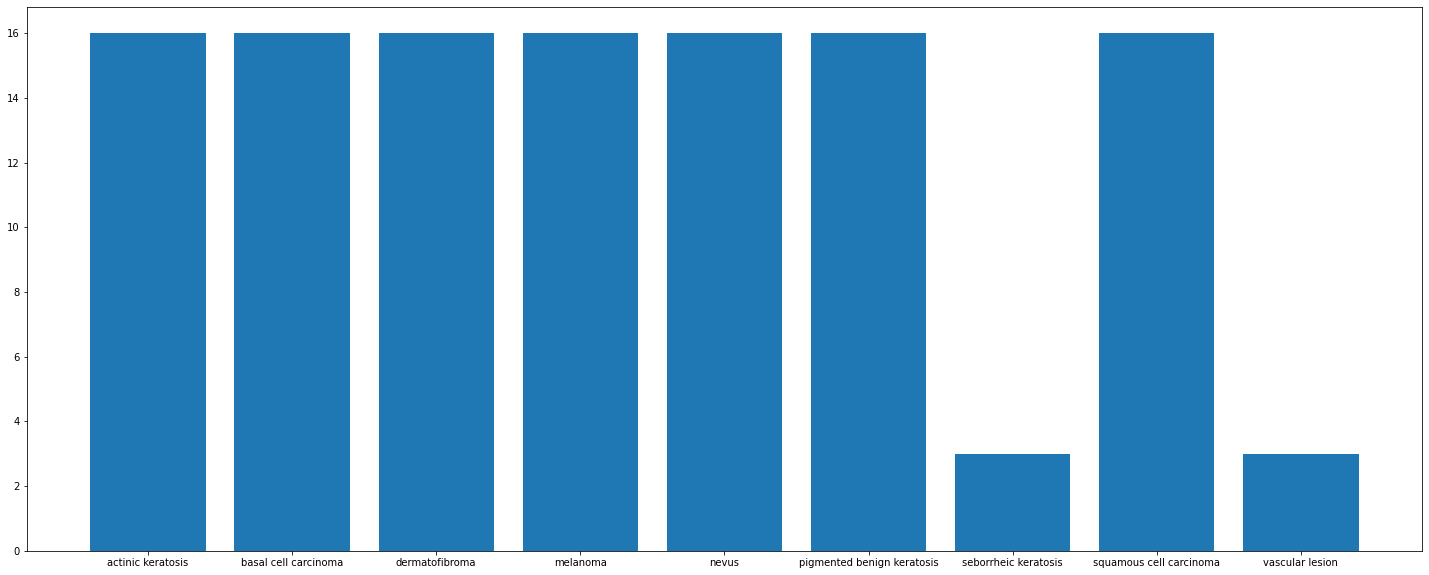

In [45]:
count=[]
for i in class_names:
    count.append(len(list(data_dir_train.glob(i+'/*.jpg'))))
plt.figure(figsize=(25,10))
plt.bar(class_names,count)

In [50]:
!pip install Augmentor



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [52]:
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline("/content/drive/MyDrive/Cancer Detection/Train",save_format='jpg')
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500)

Initialised with 2239 image(s) found.
Output directory set to /content/drive/MyDrive/Cancer Detection/Train/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F806DF22D90>: 100%|██████████| 500/500 [00:34<00:00, 14.57 Samples/s]


Initialised with 2239 image(s) found.
Output directory set to /content/drive/MyDrive/Cancer Detection/Train/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F806E082FD0>: 100%|██████████| 500/500 [00:36<00:00, 13.71 Samples/s]


Initialised with 2239 image(s) found.
Output directory set to /content/drive/MyDrive/Cancer Detection/Train/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F806DFCFED0>: 100%|██████████| 500/500 [00:33<00:00, 14.76 Samples/s]


Initialised with 2239 image(s) found.
Output directory set to /content/drive/MyDrive/Cancer Detection/Train/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F806E16AF10>: 100%|██████████| 500/500 [00:34<00:00, 14.49 Samples/s]


Initialised with 2239 image(s) found.
Output directory set to /content/drive/MyDrive/Cancer Detection/Train/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F806E1808D0>: 100%|██████████| 500/500 [00:32<00:00, 15.36 Samples/s]


Initialised with 2239 image(s) found.
Output directory set to /content/drive/MyDrive/Cancer Detection/Train/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F806DFADBD0>: 100%|██████████| 500/500 [00:32<00:00, 15.31 Samples/s]


Initialised with 2239 image(s) found.
Output directory set to /content/drive/MyDrive/Cancer Detection/Train/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F806CC531D0>: 100%|██████████| 500/500 [00:26<00:00, 18.63 Samples/s]


Initialised with 2239 image(s) found.
Output directory set to /content/drive/MyDrive/Cancer Detection/Train/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F806E06A4D0>: 100%|██████████| 500/500 [00:26<00:00, 19.14 Samples/s]


Initialised with 2239 image(s) found.
Output directory set to /content/drive/MyDrive/Cancer Detection/Train/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F8075EEA2D0>: 100%|██████████| 500/500 [00:26<00:00, 18.94 Samples/s]


In [53]:
data_dir_train1 = pathlib.Path("/content/drive/MyDrive/Cancer Detection /Train/output")
image_count_train1 = len(list(data_dir_train1.glob('*/*.jpg')))
print(image_count_train1)

0


In [54]:
for i in class_names:
      
    for j in data_dir_train1.glob(i+'/*.jpg'):
        path_list.append(str(j))
        lesion_list.append(i)
dataframe_dict_original = dict(zip(path_list, lesion_list))
new_df = pd.DataFrame(list(dataframe_dict_original.items()),columns = ['Path','Label'])
new_df

,Path,Label
0,/content/drive/MyDrive/Cancer Detection/Test/a...,actinic keratosis
1,/content/drive/MyDrive/Cancer Detection/Test/a...,actinic keratosis
2,/content/drive/MyDrive/Cancer Detection/Test/a...,actinic keratosis
3,/content/drive/MyDrive/Cancer Detection/Test/a...,actinic keratosis
4,/content/drive/MyDrive/Cancer Detection/Test/a...,actinic keratosis
...,...,...
113,/content/drive/MyDrive/Cancer Detection/Test/s...,squamous cell carcinoma
114,/content/drive/MyDrive/Cancer Detection/Test/s...,squamous cell carcinoma
115,/content/drive/MyDrive/Cancer Detection/Test/v...,vascular lesion
116,/content/drive/MyDrive/Cancer Detection/Test/v...,vascular lesion


In [55]:
new_df['Label'].value_counts()

actinic keratosis             16
basal cell carcinoma          16
dermatofibroma                16
melanoma                      16
nevus                         16
pigmented benign keratosis    16
squamous cell carcinoma       16
seborrheic keratosis           3
vascular lesion                3
Name: Label, dtype: int64

In [56]:
batch_size = 32
img_height = 180
img_width = 180

In [57]:
import pathlib

data_dir_train1=pathlib.Path("/content/drive/MyDrive/Cancer Detection/Train")

In [58]:
data_dir_train1

PosixPath('/content/drive/MyDrive/Cancer Detection/Train')

In [59]:
image_count_train1 = len(list(data_dir_train1.glob('*/*.jpg')))
print(image_count_train1)

2239


In [75]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential


data_dir_train1=pathlib.Path("/content/drive/MyDrive/Cancer Detection/Train")
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train1,
  seed=123,
  validation_split = 0.2,
  subset = "training",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 10 classes.
Using 5392 files for training.


In [76]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train1,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 10 classes.
Using 1347 files for validation.


In [77]:
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
num_classes = 9
model = Sequential([ 
                    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3))
      
])
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (180, 180, 32)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(num_classes, activation = "softmax"))

In [78]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [79]:


epochs =40

history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/40
  6/540 [..............................] - ETA: 15:59 - loss: 2.2289 - accuracy: 0.5167

InvalidArgumentError: ignored

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
# Accuracy is increased after using augmentor
# MOdel is still overfitting 